### Step 1 : Importing the libraries

In [1]:
# For data manipulation and data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For creating pipeline and doing transformation on features
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
import plotly.express as px
from umap import UMAP

In [2]:
# Loading the csv file
df = pd.read_csv('spotify_data.csv')

## Exploratory data analysis

In [3]:
# Checking shape
df.shape

(174389, 19)

In [4]:
# Checking first 4 rows of the dataframe
df.head(4)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920


In [5]:
# Let's get some basic information about all the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

## Data cleaning

In [6]:
# Removing unnecessary columns from the dataframe
df.drop(['id','release_date','year'],axis=1,inplace=True)

In [7]:
# Checking any null values and duplicated value
print(df.isnull().mean()*100)
print('Number of duplicate values',df.duplicated().sum())

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
speechiness         0.0
tempo               0.0
valence             0.0
dtype: float64
Number of duplicate values 3663


In [8]:
# Let's drop the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
# Let's check if there are any outliers in the numerical features
num_cols = df.select_dtypes(exclude='object')
df[num_cols.columns].head(3)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.991,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.634
1,0.643,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.950
2,0.993,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.689


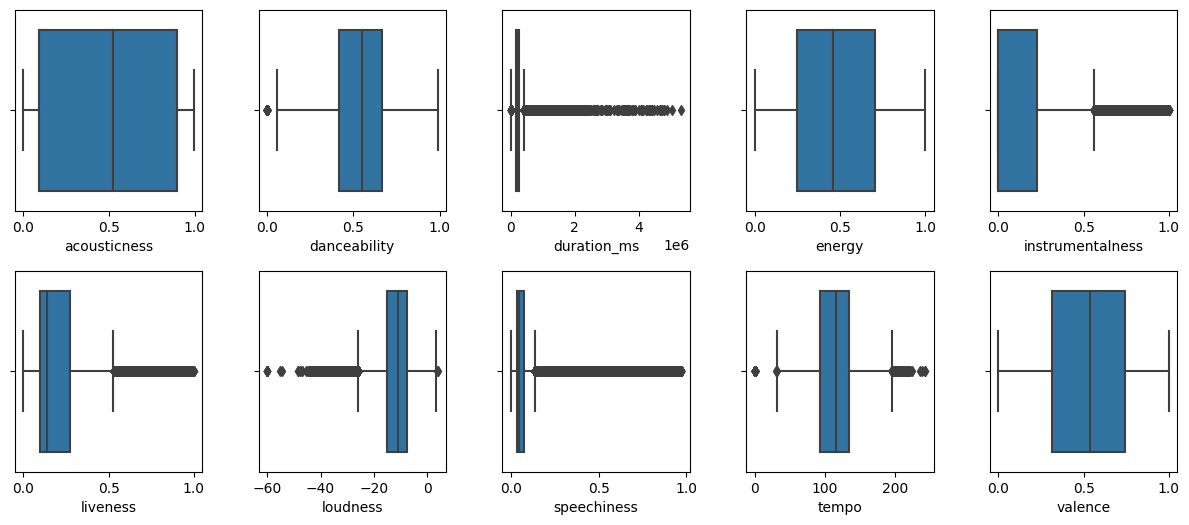

In [10]:
# Plotting boxplot to visualize if there are any outliers
fig,ax = plt.subplots(2,5,figsize = (15,6))

sns.boxplot(x = df['acousticness'],ax = ax[0][0])
sns.boxplot(x = df['danceability'],ax = ax[0][1])
sns.boxplot(x = df['duration_ms'],ax = ax[0][2])
sns.boxplot(x = df['energy'],ax = ax[0][3])
sns.boxplot(x = df['instrumentalness'],ax = ax[0][4])

sns.boxplot(x = df['liveness'],ax = ax[1][0])
sns.boxplot(x = df['loudness'],ax = ax[1][1])
sns.boxplot(x = df['speechiness'],ax = ax[1][2])
sns.boxplot(x = df['tempo'],ax = ax[1][3])
sns.boxplot(x = df['valence'],ax = ax[1][4])

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

Out of all the numerical features acounticness,energy and valence do not have any outiers.

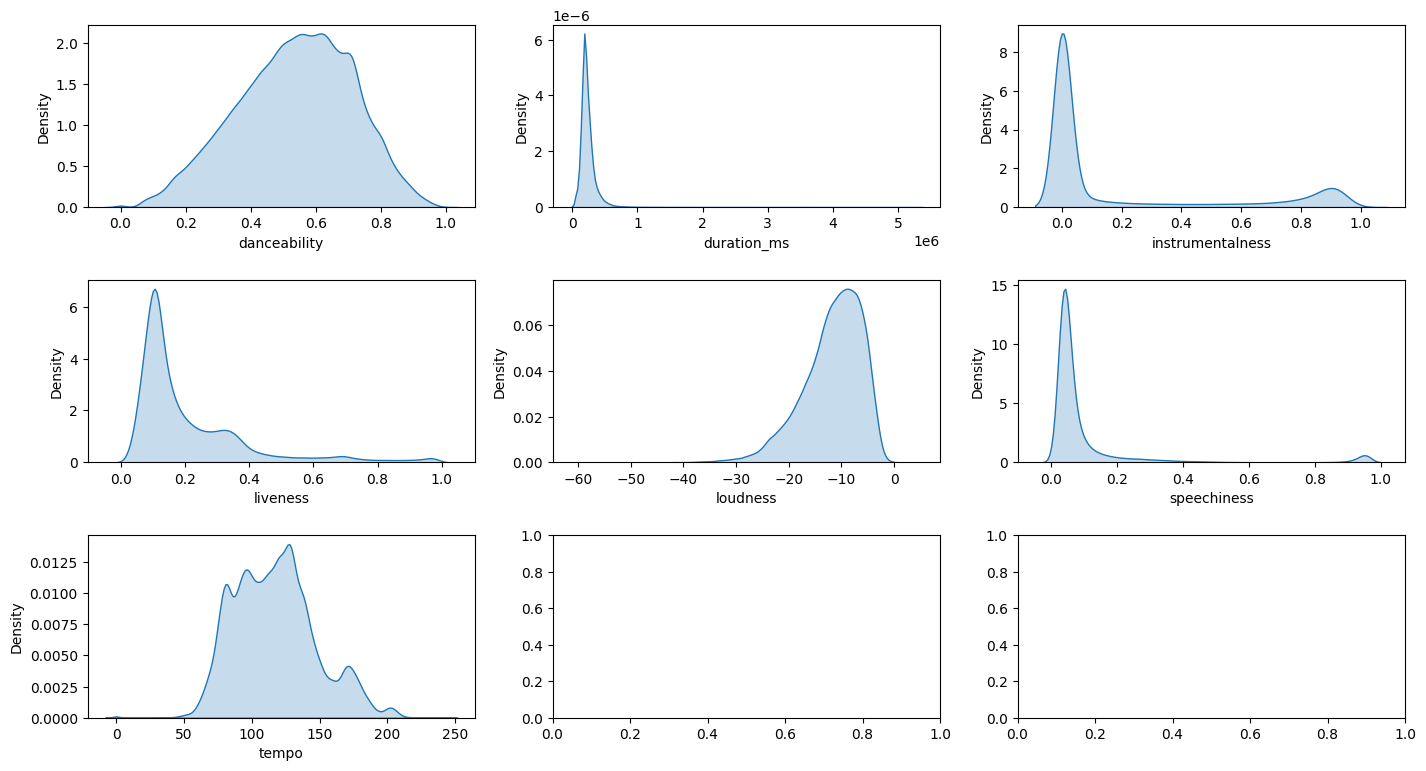

In [11]:
# Let's check the shape of distribution
fig,ax = plt.subplots(3,3,figsize = (17,9))

sns.kdeplot(x = df['danceability'],ax = ax[0][0],fill=True)
sns.kdeplot(x = df['duration_ms'],ax = ax[0][1],fill=True)
sns.kdeplot(x = df['instrumentalness'],ax = ax[0][2],fill=True)

sns.kdeplot(x = df['liveness'],ax = ax[1][0],fill=True)
sns.kdeplot(x = df['loudness'],ax = ax[1][1],fill=True)
sns.kdeplot(x = df['speechiness'],ax = ax[1][2],fill=True)
sns.kdeplot(x = df['tempo'],ax = ax[2][0],fill=True)

plt.subplots_adjust(hspace=0.4,wspace=0.2)
plt.show()

To deal with outliers we can either remove them or we can cap them. So to decide what to do with outliers let's first find the total percentage of outliers present in each feature and on the basis of that we will decide our method to deal with outliers.

In [12]:
# Handling with outliers
def find_limits(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1
    Upper_lmt = q3 + 1.5 * IQR
    Lower_lmt = q1 - 1.5 * IQR
    return [Upper_lmt,Lower_lmt]


# Empty list to store outliers percentage
outliers_per = []
for cols in ['danceability','duration_ms','instrumentalness','liveness','loudness','speechiness','tempo']:
    lmts = find_limits(df[cols])
    values = df[cols][(df[cols]>lmts[0])|(df[cols]<lmts[1])]
    outliers_per.append((len(values)/len(df[cols]))*100)

In [13]:
outliers_df = pd.DataFrame(outliers_per)
outliers_df.columns = ['Percentage']
outliers_df['features'] = ['danceability','duration_ms','instrumentalness','liveness','loudness','speechiness','tempo']
outliers_df

,Percentage,features
0,0.070288,danceability
1,5.739020,duration_ms
2,19.270058,instrumentalness
3,7.114909,liveness
4,1.875520,loudness
5,14.176517,speechiness
6,1.031477,tempo


We know that all the above 

In [14]:
nan_transformer = ColumnTransformer(transformers = [('Impute_numerical',SimpleImputer(),[0,1,2,3,5,7,8,11,12,13]),
                                                    ('Impute_Categorical',SimpleImputer(strategy='most_frequent'),[4,6,9,10])]
                                                   ,remainder='passthrough')

scaling_transformer = ColumnTransformer(transformers = [('Scale',MinMaxScaler(),[0,1,2,3,5,6,7,8,10,11,12,13])],
                                                        remainder='passthrough')

# Let's create a pipeline
pipe = Pipeline(steps = [('Nan_values',nan_transformer),
                         ('Scale_values',scaling_transformer)])

If the values have no numerical meaning and are just arbitrary labels, then you should not scale the feature. Scaling could introduce unintended numerical relationships between the categories and could cause issues with the interpretation of your results.

However, if the values do have some inherent numerical meaning (e.g., a rating scale where a higher number represents a better rating), then you may want to consider scaling the feature. You could use a scaling method that is appropriate for discrete numerical values, such as a MinMaxScaler, to scale the values to the range [0, 1]. Just be aware that scaling may change the interpretation of the values and you should carefully consider whether this is appropriate for your specific use case.

In [15]:
# Let's do train test and validation split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train,test_size=0.25, random_state=42)

# Let's seperate out names of the songs as we will use them after making clusters
song_detail = X_train[['name','artists']]
X_train.drop(['name','artists'],axis=1,inplace=True)
X_val.drop(['name','artists'],axis=1,inplace=True)

In [16]:
# Let's now all the preprocessing steps using pipeline
X_train = pipe.fit_transform(X_train)

## Model training

Things I need to focus on

3. Evaluation of model
5. Dealing with outliers
6. Using different clustring algorithm

Firt we need to find the optimal value of K for the KMeans clustering algorithm

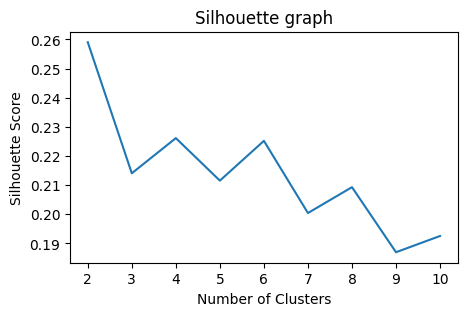

In [18]:
# Let's find out what would be the best value of K
sillhouete_scores = []
X_val = pipe.fit_transform(X_val)
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',n_init=10)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_val)
    silhouette_avg = silhouette_score(X_val, labels)
    sillhouete_scores.append(silhouette_avg)
    
    
# Visualize the graph between sillhuoette score and number of clusters
fig,ax = plt.subplots(figsize=(5,3))

plt.plot(range(2, 11), sillhouete_scores)
plt.title('Silhouette graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

From the silhouette graph we can clearly see that either 2 or 4 number of clusters will give us best result

In [18]:
# Let's create an object of KMeans class
kmeans = KMeans(n_clusters = 4,init='k-means++',n_init=10)

# Training the model
kmeans.fit(X_train)

# Let's now get the cluster to which the data points are assigned to 
clusters = kmeans.predict(X_train)
clusters = pd.Series(clusters)

In [19]:
# reset the index
song_detail = song_detail.reset_index(drop=True)

song_detail['Clusters'] = clusters
song_detail.head(5)

,name,artists,Clusters
0,...To Be Loved,['Papa Roach'],1
1,American Pie,['Don McLean'],1
2,Tea for Two - Live,['Duke Ellington'],0
3,"Insight - The Factory, Manchester Live 11 Apri...",['Joy Division'],1
4,Fado ligeiro II,"['Nuno Soares', 'Youri Popov']",2


In [20]:
# Let's now get the cluster to which the data points are assigned to 
clusters = kmeans.predict(X_train)

# Let's now create a dictionary to store similar songs based on clusters
cluster_song_dict = {}

for i in range(len(song_detail)):
    if song_detail['Clusters'][i] not in cluster_song_dict:
        cluster_song_dict[song_detail['Clusters'][i]] = [[song_detail['name'][i], song_detail['artists'][i]]]
    else:
        cluster_song_dict[song_detail['Clusters'][i]].append([song_detail['name'][i], song_detail['artists'][i]])

## Model predictions

In [40]:
print("Enter Some details")
acousticness = float(input("Enter acousticness value (0-1): "))
danceability = float(input("Enter danceability value (0-1): "))
duration_ms = int(input("Enter duration in ms: "))
energy = float(input("Enter energy value (0-1): "))
explicit = int(input("Enter explicit value (0 for not explicit, 1 for explicit): "))
instrumentalness = float(input("Enter instrumentalness value (0-1): "))
key = int(input("Enter key value (0-11): "))
liveness = float(input("Enter liveness value (0-1): "))
loudness = float(input("Enter loudness value (-60 to 0): "))
mode = int(input("Enter mode value (0 for minor, 1 for major): "))
popularity = int(input("Enter popularity value (0-100): "))
speechiness = float(input("Enter speechiness value (0-1): "))
tempo = float(input("Enter tempo value: "))
valence = float(input("Enter valence value (0-1): "))

input_features = np.array([[acousticness, danceability, duration_ms, energy, explicit, instrumentalness, key, liveness, loudness, mode, popularity, speechiness, tempo, valence]])
process_input = pipe.fit_transform(input_features)

# Making model predictions
cluster = kmeans.predict(process_input)[0]

# let's get reccomendations
cluster_song_dict[cluster]

Enter Some details


Enter acousticness value (0-1):  0
Enter danceability value (0-1):  1
Enter duration in ms:  0
Enter energy value (0-1):  1
Enter explicit value (0 for not explicit, 1 for explicit):  0
Enter instrumentalness value (0-1):  1
Enter key value (0-11):  1
Enter liveness value (0-1):  1
Enter loudness value (-60 to 0):  1
Enter mode value (0 for minor, 1 for major):  1
Enter popularity value (0-100):  1
Enter speechiness value (0-1):  1
Enter tempo value:  0
Enter valence value (0-1):  1


[['La Mezquita - Remasterizado', "['Francisco Canaro', 'Carlos Galán']"],
 ['You Got Love - 2008 Remaster', "['The Swinging Blue Jeans']"],
 ['Retrograde', "['James Blake']"],
 ['LOVES REFUGEE', "['Philip Goodhand-Tait & The Stormsville Shakers']"],
 ['你快樂所以我快樂', "['Faye Wong']"],
 ['Shades Of Cool', "['Lana Del Rey']"],
 ['Los Momentos', "['Eduardo Gatti']"],
 ['12 Concertos, Op.3 - "L\'estro Armonico" / Concerto No. 6 In A Minor For Solo Violin, RV 356: 2. Largo',
  "['Antonio Vivaldi', 'Angel Romero', 'Academy of St. Martin in the Fields', 'Iona Brown']"],
 ['Good Thoughts, Bad Thoughts', "['Funkadelic']"],
 ['Kapitel 86 - Die drei Ehen der Grand Sophy',
  "['Georgette Heyer', 'Brigitte Carlsen']"],
 ['Sanwariya Se Hamri Nahin Bani', "['Menka Bai']"],
 ['Part.6 (From En Crète sans les dieux) (1934)', "['Maurice Jaubert']"],
 ['Just Say I Love Her (Dicitencello Vuie)', "['Vic Damone']"],
 ['When You Wish Upon a Star - Mono Version', "['The Dave Brubeck Quartet']"],
 ['Moses', "['Eddi